<a href="https://colab.research.google.com/github/dvy246/pytorch/blob/main/Dataset_and_DatasetLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd # For data manipulation and analysis, especially with DataFrames.
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets.
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations.
import torch # The main PyTorch library for building neural networks.
import torch.nn as nn # Neural network modules and layers (e.g., Linear, ReLU, BatchNorm1d).
import torch.optim as optim # Optimization algorithms (e.g., SGD, Adam).
from torch.utils.data import Dataset,DataLoader # Utilities for data loading and batching.

In [ ]:
from pathlib import Path

training_data_load = Path("data/fashion-mnist_train.csv")
    
test_data_load = Path("data/fashion-mnist_test.csv")

if training_data_load.exists() and test_data_load.exists():
    print("Data files found.")
else:
    print("Data files not found.")
    


Data files found.


In [8]:
# Determine if a GPU (CUDA) is available for accelerated computing, otherwise use the CPU.
device=torch.device('mps' if torch.backends.mps.is_available() else 'cpu'   )

In [9]:
device

device(type='mps')

In [10]:
# Set a manual seed for PyTorch's random number generator.
# This ensures reproducibility of results, meaning the same code run multiple times
# will produce the same initial weights and data shuffles, leading to consistent outcomes.
torch.manual_seed(42)

In [21]:
# Read the training data from the CSV file into a pandas DataFrame.
# on_bad_lines='skip' is used to skip any lines that cause parsing errors due to inconsistent formatting.
df1=pd.read_csv(training_data_load, on_bad_lines='skip')
# Display the shape of the DataFrame (number of rows, number of columns).
df1.shape

(60000, 785)

In [22]:
df1

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df1.shape

(60000, 785)

In [24]:
# Read the test data from the CSV file into a pandas DataFrame.
# on_bad_lines='skip' is used to skip any lines that cause parsing errors due to inconsistent formatting.
df2=pd.read_csv(test_data_load, on_bad_lines='skip')
# Display the shape of the DataFrame (number of rows, number of columns).
df2.shape

(10000, 785)

In [25]:
# Concatenate the training and test DataFrames (df1 and df2) vertically.
# This combines both datasets into a single DataFrame 'df' for initial processing.
df=pd.concat([df1,df2])

In [26]:
df.shape

(70000, 785)

In [27]:
df['label'].value_counts()

label
2    7000
9    7000
6    7000
0    7000
3    7000
4    7000
5    7000
8    7000
7    7000
1    7000
Name: count, dtype: int64

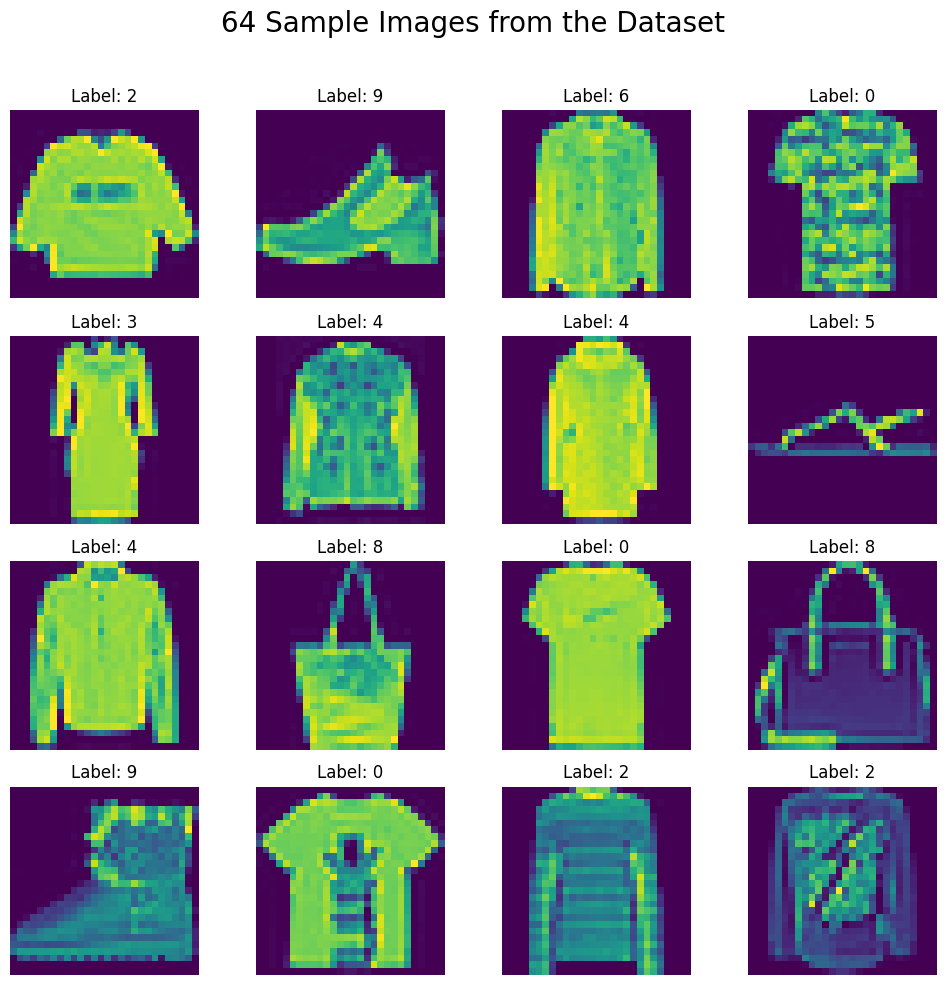

In [28]:
# Create an 8x8 grid of subplots for displaying images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Set a dynamic super title for the entire figure
# It displays the number of images plotted, which is 64 (8*8)
num_images = 8 * 8
plt.suptitle(f'{num_images} Sample Images from the Dataset', size=20)

# Loop through each subplot in the grid and display an image
for i, ax in enumerate(axes.flat):
    # Extract image data (pixels) from the DataFrame, skipping the label column
    # Reshape the 1D pixel array into a 28x28 image for display
    image = df.iloc[i, 1:].values.reshape(28, 28)

    # Display the image in the current subplot
    ax.imshow(image)

    # Remove the axis ticks and labels for a cleaner visual
    ax.axis('off')

    # Set the title of each subplot to show the corresponding image's label
    ax.set_title(f'Label: {df.iloc[i, 0]}')

# Adjust subplot parameters for a tight layout, ensuring elements do not overlap
# The rect parameter leaves space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjusted rect to accommodate suptitle

# Display the plot
plt.show()

In [29]:
# Define features (X) and labels (y) from the combined DataFrame.
# X will contain all pixel columns (from the second column onwards, index 1 to end).
X=df.iloc[:,1:]
# y will contain the 'label' column (the first column, index 0).
y=df.iloc[:,0]

In [30]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y

In [31]:
# Split the dataset into training and testing sets.
# X_train, y_train: Features and labels for training (80% of the data).
# X_test, y_test: Features and labels for testing (20% of the data).
# test_size=0.2 specifies that 20% of the data will be used for the test set.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
# Scale the pixel values of the training and testing features.
# Pixel values typically range from 0 to 255. Dividing by 255 normalizes them
# to a range of 0 to 1. This helps in faster and more stable training of neural networks.
X_train=X_train/255.0
X_test=X_test/255.0

In [33]:
# Custom Dataset class to handle the image features and labels.
# This class inherits from torch.utils.data.Dataset and provides methods
# for accessing individual data samples.
class CustomDatest(Dataset):

  def __init__(self,features,labels):
    # Constructor: Initializes the dataset with features and labels.
    # Converts pandas DataFrames to PyTorch tensors with appropriate data types.
    # features are converted to float32 (common for neural network inputs).
    # labels are converted to long (required for CrossEntropyLoss).
    self.features=torch.tensor(features.to_numpy(),dtype=torch.float32)
    self.labels=torch.tensor(labels.to_numpy() ,dtype=torch.long)

  def __len__(self):
    # Returns the total number of samples in the dataset.
    return len(self.features)

  def __getitem__(self,indx):
    # Returns a single sample (feature-label pair) at the given index.
    return self.features[indx],self.labels[indx]

In [34]:
dataset=CustomDatest(X_train,y_train)
test=CustomDatest(X_test,y_test)

In [ ]:
dataset[0]

In [35]:
# Create DataLoader objects for efficient batching and loading of data during training and testing.
# DataLoader handles shuffling, batching, and loading data in parallel.

# training_data_load: DataLoader for the training dataset.
# dataset: The custom dataset object for training data.
# shuffle=True: Shuffles the data at each epoch to improve generalization and prevent overfitting.
# batch_size=32: Processes 32 samples at a time.
# pin_memory=True: Transfers data to GPU faster by 'pinning' it in CPU RAM.
training_data_load=DataLoader(dataset=dataset,shuffle=True,batch_size=32,pin_memory=True)

# test_data_load: DataLoader for the test dataset.
# test: The custom dataset object for test data.
# shuffle=False: No need to shuffle test data, as order does not affect evaluation.
# batch_size=32: Processes 32 samples at a time.
# pin_memory=True: Transfers data to GPU faster by 'pinning' it in CPU RAM.
test_data_load=DataLoader(dataset=test,shuffle=False,batch_size=32,pin_memory=True)

In [44]:
from torch.nn.modules.activation import ReLU

# Define the neural network architecture.
# MyNN inherits from nn.Module, which is the base class for all neural network modules in PyTorch.
class MyNN(nn.Module):

  def __init__(self,num_features):
    # Constructor: Initializes the layers of the neural network.
    super().__init__() # Call the constructor of the parent class (nn.Module).

    # Define the sequential model, which is a container for modules that will be
    # added in the order they are passed in the constructor.
    self.Model=nn.Sequential(

        # First Linear layer: Input features (e.g., 784 pixels) to 128 neurons.
        nn.Linear(num_features,128),
        # ReLU activation function: Introduces non-linearity.
        nn.ReLU(),
        # BatchNorm1d: Normalizes outputs from the previous layer to stabilize and speed up training.
        nn.BatchNorm1d(128),
        # Second Linear layer: 128 neurons to 80 neurons.
        nn.Linear(128,80),
        # ReLU activation.
        nn.ReLU(),
        # BatchNorm1d.
        nn.BatchNorm1d(80),
        # Dropout layer: Randomly sets a fraction (p=0.4) of input units to 0 at each update
        # during training. This helps prevent overfitting.
        nn.Dropout(p=0.4),
        # Third Linear layer: 80 neurons to 60 neurons.
        nn.Linear(60,20),
        # ReLU activation.
        nn.ReLU(),
        # Final Linear layer: 20 neurons to 10 neurons (output classes for Fashion MNIST).
        nn.Linear(20,10) )
    
     def forward(self,x):
      # Forward pass: Pass the input through the sequential model.
      return self.Model(x)

IndentationError: unexpected indent (3510015888.py, line 37)

In [45]:
# Initialize the neural network model with the number of input features (pixels).
model=MyNN(X_train.shape[1])

# Move the model to the specified device (GPU if available, else CPU) for computation.
model.to(device)

# Set the learning rate for the optimizer. This controls the step size during weight updates.
lr=0.1
# Define the number of training epochs (full passes over the training dataset).
epochs=3

# Define the Loss Function: CrossEntropyLoss is commonly used for multi-class classification problems.
# It combines LogSoftmax and NLLLoss (Negative Log Likelihood Loss).
Loss=nn.CrossEntropyLoss()

# Define the Optimizer: Stochastic Gradient Descent (SGD) is used to update model parameters.
# params=model.parameters(): Specifies which parameters the optimizer should update.
# lr=lr: Sets the learning rate.
# weight_decay=1e-4: Adds L2 regularization (a small penalty to the loss for large weights)
# to help prevent overfitting.
optimizer=optim.SGD(params=model.parameters(),lr=lr,weight_decay=1e-4)

In [46]:
for epocs in range(epochs):

  # Initialize total loss for the current epoch.
  total_epoch_loss=0

  # Iterate through batches of training data.
  for batch_features,batch_labels in training_data_load:

                  # Move batch features and labels to the specified device (GPU/CPU).
                  batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

                  # Forward pass: Compute model output (predictions) for the current batch.
                  output=model(batch_features)

                  # Loss calculation: Compute the loss between model output and true labels.
                  loss=Loss(output,batch_labels)

                  # Zero gradients: Clear previous gradients before computing new ones.
                  # This is crucial because PyTorch accumulates gradients by default.
                  optimizer.zero_grad()

                  # Backward pass: Compute gradients of the loss with respect to model parameters.
                  loss.backward()

                  # Optimizer step: Update model parameters using the computed gradients and learning rate.
                  optimizer.step()

                  # Accumulate loss for the current epoch.
                  total_epoch_loss+=loss.item()


  # Calculate the average loss for the current epoch.
  avg_loss=total_epoch_loss/len(training_data_load)

  # Print the epoch number and the average training loss.
  print(f'epoch {epocs+1} and the avg loss {avg_loss:.2f}')

/Users/divyyadav/Desktop/pytorch/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


NotImplementedError: Module [MyNN] is missing the required "forward" function

In [ ]:
!pip install torchinfo

In [ ]:
import torchinfo

In [ ]:
torchinfo.summary(model=model,input_size=(1,X_train.shape[1]))

In [ ]:
from pathlib import Path


model=Path('Model')

model.mkdir(parents=True,exist_ok=True)

model_name='new.pth'

final=model/model_name



In [ ]:
final

In [ ]:
torch.save(model.state_dict(),final)

In [ ]:
# Set the model to evaluation mode. This disables dropout and batch normalization layers
# if they are present in the model, as these behave differently during training and evaluation.
model.eval()

# Initialize variables to keep track of the total number of samples and correctly predicted samples.
total = 0
correct = 0

# Disable gradient calculations for evaluation. This is important because we don't need
# to compute gradients during inference, which saves memory and speeds up computations.
with torch.no_grad():
  # Iterate through the test data using the DataLoader, which provides batches of features and labels.
  for batch_features, batch_lables in test_data_load:

    #gpu acceleration - Move both features and labels to the device
    batch_features, batch_lables = batch_features.to(device), batch_lables.to(device)

    # Perform a forward pass to get raw model outputs (logits) for the current batch.
    y_prediction = model(batch_features)

    # Get the predicted class by finding the index of the maximum value along dimension 1 (the class dimension).
    # torch.max returns both the maximum value and its index. We only need the index.
    _, prediction = torch.max(y_prediction, 1)

    # Update the total number of samples processed.
    total += batch_lables.shape[0] # batch_lables.shape[0] gives the number of samples in the current batch.

    # Count how many predictions in the current batch match the true labels.
    # (prediction == batch_lables) creates a boolean tensor, .sum() counts True values,
    # and .item() converts the single-element tensor to a Python number.
    correct += (prediction == batch_lables).sum().item()

# After iterating through all test data, calculate the overall accuracy.
# Accuracy is the ratio of correctly predicted samples to the total number of samples.
print(round(correct / total,2))


In [ ]:
# Set the model to evaluation mode. This disables dropout and batch normalization layers
# if they are present in the model, as these behave differently during training and evaluation.
model.eval() # Ensure the model is in evaluation mode.

# Initialize variables to keep track of the total number of samples and correctly predicted samples.
# Resetting total and correct here for an accurate calculation of training accuracy after the test accuracy calculation.
total = 0
correct = 0

# Disable gradient calculations for evaluation. This is important because we don't need
# to compute gradients during inference, which saves memory and speeds up computations.
with torch.no_grad():
  # Iterate through the training data using the DataLoader, which provides batches of features and labels.
  for batch_features, batch_lables in training_data_load: # Using training_data_load here for training accuracy

    # GPU acceleration - Move both features and labels to the device
    batch_features, batch_lables = batch_features.to(device), batch_lables.to(device)

    # Perform a forward pass to get raw model outputs (logits) for the current batch.
    y_prediction = model(batch_features)

    # Get the predicted class by finding the index of the maximum value along dimension 1 (the class dimension).
    # torch.max returns both the maximum value and its index. We only need the index.
    _, prediction = torch.max(y_prediction, 1)

    # Update the total number of samples processed.
    total += batch_lables.shape[0] # batch_lables.shape[0] gives the number of samples in the current batch.

    # Count how many predictions in the current batch match the true labels.
    # (prediction == batch_lables) creates a boolean tensor, .sum() counts True values,
    # and .item() converts the single-element tensor to a Python number.
    correct += (prediction == batch_lables).sum().item()

# After iterating through all training data, calculate the overall training accuracy.
# Accuracy is the ratio of correctly predicted samples to the total number of samples.
print(round(correct / total,2))

# HyperParameter tunning using Optuna and CNN implementation

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn

In [ ]:
!pip install optuna

In [ ]:
class CustomDatest(Dataset):
  def __init__(self,features,labels):

    self.features=torch.tensor(features,dtype=torch.float32,device=device)
    self.labels=torch.tensor(features,dtype=torch.long,device=device)

  def __len__(self,features):
    return len(self.features)


  def __getitem__(self, index):
    return self.features[index],self.labels[index]



In [ ]:
training_data_load=DataLoader(dataset=dataset,shuffle=True,batch_size=32,pin_memory=True)

In [ ]:
class FlexibileMyNN(nn.Module):

  def __init__(self,input_dims,output_dims,hidden_number_layers,neuron_per_layer,dropout_rate):

    #calling the parent class constructor
    super().__init__()

    #making  the model

    #collecting all the layers in a list
    layers=[]

    #looping throught the hidden layers
    #in each iteration we add the hidden layer to the layers list
    for i in range(hidden_number_layers):

      layers.append(nn.Linear(input_dims,neuron_per_layer))
      layers.append(nn.BatchNorm1d(neuron_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      #making sure tat in the next loop the outputlayer becomes the input
      input_dims=neuron_per_layer

    layers.append(nn.Linear(neuron_per_layer,output_dims))

    self.model=nn.Sequential(*layers)

    #forward props
  def forward(self,features):

      output=self.model(features)

      return output



In [ ]:
from os import truncate
#objective function

def objective_function(trial):

  #next hyperparams suggestions
  neuron_per_layer=trial.suggest_int('neurons',8,264,step=8)
  hidden_number_layers=trial.suggest_int('hidden_layers',1,10)
  epochs=trial.suggest_int('epochs',20,120,step=20)
  learning_rate=trial.suggest_int('lr',0.1,0.5)
  weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-2,log=True)
  dropout_rate=trial.suggest_int('droput',2,6,step=1)

  #input and output_dims

  input_dims=784
  output_dims=10

  #model init

  model=FlexibileMyNN(input_dims,output_dims=output_dims,hidden_number_layers=hidden_number_layers,neuron_per_layer=neuron_per_layer,dropout_rate=dropout_rate)

  model.to(device)

  #params

  learning_rate=learning_rate

  epochs=epochs

  loss=nn.CrossEntropyLoss()

  #optimizer selection

  optimizer=torch.optim.SGD(params=model.parameters(),weight_decay=weight_decay,lr=learning_rate)

  #dataset_loading

  training_data_load=DataLoader(dataset=dataset,shuffle=True,batch_size=32,pin_memory=True)
  test_data_load=DataLoader(dataset=test,shuffle=False,batch_size=32,pin_memory=True)

  #training loop

  for i in range(epochs):

    for batch_features,batch_labels in training_data_load:

      batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

      #forward_propagation
      prediction=model(batch_features)

      #lloss_calculation
      loss_output=loss(prediction,batch_labels)

      #zero_optimizers
      optimizer.zero_grad()

      #backward_prop
      loss_output.backward()

      #Optimize
      optimizer.step()

  #evaluation

  model.eval()

  total=0
  correct=0

  #evaluation loop on test data


  with torch.no_grad():

    for  batch_features,batch_labels in test_data_load:

      batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

      #forward_propagation
      prediction=model(batch_features)

      #finding the maximum probability
      _,prediction=torch.max(prediction,1)

      #total size
      total+=batch_features.shape[0]

      #correct predictions
      correct+=(prediction==batch_labels).sum().item()

  accuracy=correct/total

  #return the accuracy to optimize
  return accuracy

In [ ]:
import optuna as opt

pruner=opt.pruners.MedianPruner(n_warmup_steps=5)

study=opt.create_study(direction='maximize',pruner=pruner)

In [ ]:
study.optimize(objective_function,n_trials=3)

# Non Sequential Neural Networks


In [ ]:
import numpy as np
import torch

# 1. Settings
num_samples = 1000
feat1_size = 10  # 10 Subjects (Academics)
feat2_size = 5   # 5 Behavior Stats
num_classes = 10 # Final Grade (0 to 9)

# 2. Generate Structured Data (Patterns, not just noise)

# --- Branch A: Academics (0.0 to 1.0 representing 0% to 100%) ---
# We use a normal distribution so most students are "average" (0.5)
data_x1_numpy = np.random.normal(loc=0.5, scale=0.15, size=(num_samples, feat1_size))
# Clip values to ensure they stay between 0 and 1
data_x1_numpy = np.clip(data_x1_numpy, 0, 1).astype(np.float32)

# --- Branch B: Behavior (0.0 to 1.0) ---
# Similar logic: most students have decent behavior
data_x2_numpy = np.random.normal(loc=0.7, scale=0.1, size=(num_samples, feat2_size))
data_x2_numpy = np.clip(data_x2_numpy, 0, 1).astype(np.float32)

# 3. Create the Target (The "Secret Formula")
# The Model has to LEARN this formula during training.
# Logic: Grade is mostly based on Academics (70% weight) and Behavior (30% weight)
avg_academics = np.mean(data_x1_numpy, axis=1) # Average score across 10 subjects
avg_behavior = np.mean(data_x2_numpy, axis=1)  # Average behavior score

# Calculate a "Raw Score" (0.0 to 1.0)
raw_score = (0.7 * avg_academics) + (0.3 * avg_behavior)

# Add a tiny bit of random noise (because real life isn't perfect)
noise = np.random.normal(0, 0.02, size=num_samples)
final_score = raw_score + noise

# Convert 0.0-1.0 score to a Grade Class (0 to 9)
# e.g., 0.95 -> Class 9, 0.1 -> Class 1
targets_numpy = (final_score * 10).astype(np.int64)
targets_numpy = np.clip(targets_numpy, 0, 9) # Ensure we don't go over 9

# 4. Final Conversion to Tensors
data_x1 = data_x1_numpy
data_x2 = data_x2_numpy
data_y = targets_numpy

# --- Verification ---
print(f"Student 1 Academics Avg: {avg_academics[0]:.2f}")
print(f"Student 1 Behavior Avg:  {avg_behavior[0]:.2f}")
print(f"Student 1 Calculated Grade Class: {data_y[0]}")
print("\nData is ready! There is a discoverable pattern (70% Academics + 30% Behavior).")

In [ ]:
data_x1.shape

In [ ]:
data_x2.shape

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else print('no'))

In [ ]:
device

In [ ]:
from torch.utils.data import Dataset,DataLoader

class CustomDatest(Dataset):
  def __init__(self,features1,features2,labels):

    self.features1=torch.tensor(features1,dtype=torch.float32,device=device)
    self.features2=torch.tensor(features2,dtype=torch.float32,device=device)
    self.labels=torch.tensor(labels,dtype=torch.long,device=device)

  def __len__(self):
    return len(self.features1)


  def __getitem__(self, index):

    return self.features1[index],self.labels[index],self.features2[index]

In [ ]:
training_data=CustomDatest(data_x1,data_x2,data_y)

In [ ]:
data_load_test=DataLoader(training_data,batch_size=10,shuffle=True)

In [ ]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, number_of_features1, number_of_features2):

        super().__init__()

        # --- BRANCH 1 (Academics) ---
        # FIX: Used nn.Sequential instead of a list []
        self.model1 = nn.Sequential(
            nn.Linear(number_of_features1, 182),
            nn.BatchNorm1d(182),
            nn.ReLU(),
            nn.Dropout(p=0.3),

            nn.Linear(182, 20),
            nn.BatchNorm1d(20),  # FIX: Changed 182 to 20 to match previous layer
            nn.ReLU(),
            nn.Dropout(p=0.3),   # FIX: Removed extra 'nn.'

            nn.Linear(20, 4)     # Output is 4 features
        )

        # --- BRANCH 2 (Behavior) ---
        # FIX: Input should likely be 'number_of_features2', not 1
        self.model2 = nn.Sequential(
            nn.Linear(number_of_features2, 182),
            nn.BatchNorm1d(182),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(182, 20)   # Output is 20 features
        )

        # --- FINAL MERGED LAYER ---
        # Input = Output of Model 1 (4) + Output of Model 2 (20) = 24
        self.last_layer = nn.Sequential(
            nn.Linear(24, 200),
            nn.BatchNorm1d(200),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(200, 10)
        )

    def forward(self, x_features, y_features):
        # 1. Process Branch A
        output1 = self.model1(x_features)  # Shape: [Batch, 4]

        # 2. Process Branch B
        output2 = self.model2(y_features)  # Shape: [Batch, 20]

        # 3. THE MERGE (Concatenate, don't Add)
        # Glue them together side-by-side (dim=1)
        # Result Shape: [Batch, 24]
        combined_output = torch.cat((output1, output2), dim=1)

        # 4. Final Prediction
        final_output = self.last_layer(combined_output)

        return final_output


In [ ]:
def train_nn(epochs,lr,data_load_test=data_load_test):

    model = NeuralNetwork(number_of_features1=10, number_of_features2=5)

    model.to(device=device)

    Loss=nn.CrossEntropyLoss()

    optimizer=torch.optim.SGD(model.parameters(),lr=lr)

    for epocs in range(epochs):

      total_loss=0

      for batch_x1,batch_x2,batch_labels in data_load_test:

                #forward_pass
                output=model(batch_x1,batch_x2)

                #loss
                loss=Loss(output,batch_labels)

                #backprop and zero_grad
                optimizer.zero_grad()

                loss.backward()

                #optimize
                optimizer.step()


                total_loss+=loss.item()


      # Calculate the average loss for the current epoch.
      avg_loss=total_loss/len(data_load_test)

      # Print the epoch number and the average training loss.
      print(f'epoch {epocs+1} and the avg loss {avg_loss:.2f}')



In [ ]:

trained_model = train_nn(epochs=50, lr=0.01)

In [ ]:
torch.cat((torch.tensor([1,2,3]),torch.tensor([12,3,4])),dim=0)

In [ ]:
import torch

# Create two identical tensors
# Shape: [2 rows, 3 columns]
t1 = torch.tensor([[1, 2, 3],
                   [4, 5, 6]])

t2 = torch.tensor([[10, 20, 30],
                   [40, 50, 60]])

In [ ]:
torch.cat((t1,t2),dim=1)

In [ ]:
torch.cat((t1,t2),dim=0)

In [ ]:
t1.reshape(1,3,2)

# CNN